<a href="https://colab.research.google.com/github/chris-kehl/neuralNetworksBasic/blob/master/kehl_working1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#*********************#
#* Chris Kehl        *#
#* CECS 590-50       *#
#* Assignment_1 pb 4 *# 
#*********************#

In [0]:
from __future__ import absolute_import, division, print_function

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler


In [0]:
# Generate Train Data
X_train= np.random.randn(100, 2) + np.array([-2.5, -2.5])
Y_train = np.random.randn(100, 2) + np.array([1, 4])


In [207]:
X_train

array([[-3.10839672, -3.16863205],
       [-2.97520829, -2.20708405],
       [-3.19069383, -2.30804117],
       [-3.72809803, -4.44608335],
       [-2.38148612, -2.67006789],
       [-1.95317702, -2.79733073],
       [-0.91988651, -3.57573811],
       [-2.26397665,  0.28242302],
       [-2.25512721, -1.89697954],
       [-2.31369651, -2.37237477],
       [-1.71766027, -2.69625325],
       [-0.09617994, -3.10038854],
       [-1.38175881, -4.09132893],
       [-1.73756192, -1.38723534],
       [-3.58620071, -3.53740172],
       [-2.38965778, -1.96723326],
       [-1.34014952, -0.20885436],
       [-3.25702741, -0.95875429],
       [-2.88576288, -0.01078241],
       [-2.60596875, -5.86266054],
       [-2.2665325 , -2.37254942],
       [-3.2982251 , -2.2263517 ],
       [-3.28772458, -1.68110438],
       [-1.80814208, -0.53071519],
       [-3.03434078, -2.613085  ],
       [-3.1702462 , -3.54475077],
       [-0.35665112, -2.88433631],
       [-2.99781757, -3.78531188],
       [-3.96606639,

In [208]:
Y_train

array([[ 0.40933143,  2.95720201],
       [ 0.51684868,  4.33466139],
       [ 1.37147595,  4.89599538],
       [ 0.51833459,  4.73050266],
       [ 0.5308875 ,  3.27597086],
       [ 2.82626881,  5.72373266],
       [ 0.64104454,  2.93223592],
       [ 0.46138137,  4.85904563],
       [ 1.80202321,  4.47369816],
       [ 1.83828836,  4.98283794],
       [ 2.59325252,  2.81208741],
       [ 1.57213885,  2.7133236 ],
       [ 1.93196953,  3.35271062],
       [ 0.31479653,  3.74638491],
       [ 1.08242491,  3.70747988],
       [-0.13265702,  5.75081298],
       [ 1.44841195,  4.4745301 ],
       [ 1.41982887,  4.73897652],
       [ 3.68065728,  3.53884048],
       [ 1.8844135 ,  3.85680974],
       [ 1.73277686,  3.64754343],
       [ 1.85744104,  4.62570534],
       [ 0.75944678,  3.93991375],
       [ 1.85025983,  4.24895499],
       [ 0.71877224,  3.68434397],
       [ 1.63772385,  2.78047234],
       [ 1.21598081,  3.71408345],
       [ 1.98787095,  6.04087622],
       [-0.0928099 ,

In [0]:
feature_set = np.vstack([X_train, Y_train])

In [0]:
labels = np.array([0]*100 + [1]*100)

In [0]:
one_hot_labels = np.zeros((200,2))

In [0]:
for i in range(200):
  one_hot_labels[i, labels[i]] = 1

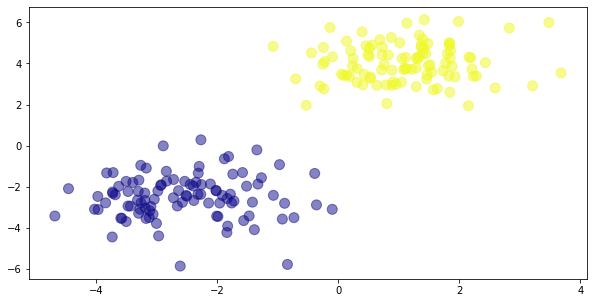

In [213]:
plt.figure(figsize=(10,5))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [0]:
def relu(X):
   return np.maximum(0,X)

In [0]:
def sigmoid(X):
  return 1/(1+np.exp(-X))


In [0]:
def softmax(X):
  expA = np.exp(A)
  return expA / exp.sum(axis=1, keepims=True)

In [0]:
instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 4
output_labels = 2

In [0]:
wh = np.random.rand(attributes, hidden_nodes)
bh = np.random.randn(hidden_nodes)


In [0]:
wo = np.random.rand(hidden_nodes, output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

In [0]:
error_cost=[]

In [222]:
for epoch in range(50000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = relu(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = sigmoid(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = relu(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        #error_cost.append(loss)

Loss function value:  38.5504951472294
Loss function value:  0.13670110956728634
Loss function value:  0.06555729520578951
Loss function value:  0.04262974981320516
Loss function value:  0.03137547456795428
Loss function value:  0.024714566844496112
Loss function value:  0.020323675327970157
Loss function value:  0.017217760160404865
Loss function value:  0.014908479389231843
Loss function value:  0.013126481143792472
Loss function value:  0.011711177657935688
Loss function value:  0.010560961507267987
Loss function value:  0.009608450649219887
Loss function value:  0.008807224134446486
Loss function value:  0.008124276286397877
Loss function value:  0.007535507833154159
Loss function value:  0.007022918685887121
Loss function value:  0.00657279806739341
Loss function value:  0.006174522063973471
Loss function value:  0.005819733582009104
Loss function value:  0.005501770109073408
Loss function value:  0.0052152561963534644
Loss function value:  0.00495580793698472
Loss function value:

In [0]:
# Generate Train Data
X_train= np.random.randn(100, 2) + np.array([5, 10])
Y_train = np.random.randn(100, 2) + np.array([0, 8])


In [187]:
X_train

array([[ 5.68891234,  8.3511217 ],
       [ 4.18659347,  9.56875285],
       [ 6.1001302 , 10.28553266],
       [ 5.03021201,  9.16492164],
       [ 4.20437642, 11.43325831],
       [ 2.73674809,  9.72322681],
       [ 3.74406318,  8.01646716],
       [ 6.02914077,  9.17010168],
       [ 5.57138626, 10.1535743 ],
       [ 4.9520019 ,  9.69445026],
       [ 3.8790605 ,  9.04632354],
       [ 5.32562149,  9.01304877],
       [ 5.02912487,  8.65962418],
       [ 6.33289429,  7.39514681],
       [ 5.8731974 ,  8.76856646],
       [ 5.37887607,  9.33554615],
       [ 4.92017094,  8.60837949],
       [ 6.32401117, 11.38868119],
       [ 4.16123132,  8.25606226],
       [ 4.70431812, 11.10360476],
       [ 4.07054687,  8.82296028],
       [ 3.51923554,  9.51424929],
       [ 5.18494284, 12.17492362],
       [ 5.20966827, 10.76134528],
       [ 4.13210213, 10.34597689],
       [ 4.77750583, 10.61877869],
       [ 5.42810139,  9.32603639],
       [ 5.02506393,  8.36115116],
       [ 4.77522943,

In [188]:
Y_train

array([[ 1.17640152e+00,  8.55291576e+00],
       [ 1.86727169e-01,  7.57400207e+00],
       [-1.16707319e+00,  7.39088826e+00],
       [ 7.02471105e-01,  8.45555704e+00],
       [ 7.03230782e-01,  8.41590421e+00],
       [ 7.92361650e-01,  8.05568839e+00],
       [-5.74856436e-01,  7.07074541e+00],
       [-9.29276398e-02,  8.56240589e+00],
       [-2.23011093e+00,  6.69061037e+00],
       [ 1.30794457e+00,  8.24536429e+00],
       [-1.95899246e-01,  5.20212410e+00],
       [ 5.46603245e-01,  8.03796779e+00],
       [-1.14677001e+00,  9.78230068e+00],
       [-1.22559140e+00,  8.14951996e+00],
       [-2.22321741e+00,  6.67598232e+00],
       [-1.49490215e+00,  7.09152704e+00],
       [ 4.00382528e-01,  7.42057168e+00],
       [ 6.27020840e-01,  9.26371288e+00],
       [-1.37748083e+00,  9.01644921e+00],
       [ 5.53679223e-01,  7.96058026e+00],
       [-3.35733400e-01,  9.29506305e+00],
       [ 2.52712545e-01,  7.10051966e+00],
       [-2.09126542e+00,  7.19641460e+00],
       [-1.

In [0]:
feature_set = np.vstack([X_train, Y_train])

In [0]:
labels = np.array([0]*100 + [1]*100)

In [0]:
one_hot_labels = np.zeros((200,2))

In [0]:
for i in range(200):
  one_hot_labels[i, labels[i]] = 1

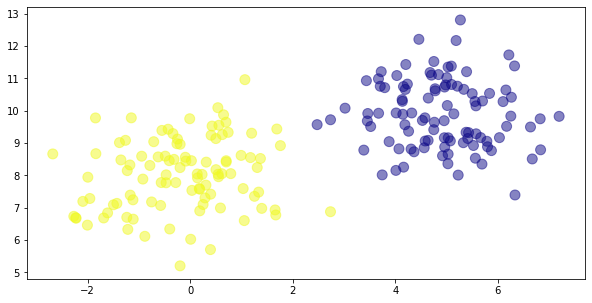

In [194]:
plt.figure(figsize=(10,5))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

In [0]:
instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 4
output_labels = 2

In [0]:
wh = np.random.rand(attributes, hidden_nodes)
bh = np.random.randn(hidden_nodes)

In [0]:
wo = np.random.rand(hidden_nodes, output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

In [0]:
error_cost=[]

In [203]:
for epoch in range(50000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = relu(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = sigmoid(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        #error_cost.append(loss)

Loss function value:  4.30697767907438
Loss function value:  9.71731529041385
Loss function value:  6.538467966182992
Loss function value:  5.354758410162819
Loss function value:  4.675472691784639
Loss function value:  4.208348567774534
Loss function value:  3.848256079723205
Loss function value:  3.551635420589294
Loss function value:  3.294220814287262
Loss function value:  3.063763897282341
Loss function value:  2.853577441062752
Loss function value:  2.6598574046504844
Loss function value:  2.4804898022396094
Loss function value:  2.314516762683261
Loss function value:  2.161277582754834
Loss function value:  2.020139292062317
Loss function value:  1.890228382796849
Loss function value:  1.7709528236397354
Loss function value:  1.6617591283504707
Loss function value:  1.5618923432336365
Loss function value:  1.4705422756573148
Loss function value:  1.3869772065726291
Loss function value:  1.310488166113477
Loss function value:  1.2404047430515077
Loss function value:  1.1761127400